In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
pd.set_option('display.max_columns', 500)

# Import supplementary visualization code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset`
data = pd.read_csv("ott5.csv")

# Success - Display the first record
display(data.head(n=1))


C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,chnl_prtnr_cust_cd,eop,base_pkg_prd_nm,chnl_actvt_chnl_grp,wirls_hshld_ind,dtv_hshld_ind,uvrs_tv_hshld_ind,uvrs_int_hshld_ind,uvrs_vce_hshld_ind,day_0_dur,day_1_dur,day_2_dur,day_3_dur,vsf,ebvs,avg_startup_time,rebuffering_ratio,sports_flag,news_flag,kids_flag,live_perc,dvr_perc,vod_perc,ch_ct,email_flag,aud_flag,devices
0,1.810190e+14,1,Live a Little,NR/LSP/Indirect eComm/CP,Y,N,N,N,N,0,0,0,0,0,1,5285.0,0.0,0,0,0,0.0,0.0,0.0,0,0,0,0


In [2]:
def func(row):
    if row['wirls_hshld_ind'] == '?':
        return 0
    elif row['wirls_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['wirls'] = data.apply(func, axis=1)

In [3]:
def func(row):
    if row['dtv_hshld_ind'] == '?':
        return 0
    elif row['dtv_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['dtv'] = data.apply(func, axis=1)

In [4]:
def func(row):
    if row['uvrs_tv_hshld_ind'] == '?':
        return 0
    elif row['uvrs_tv_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['uvtv'] = data.apply(func, axis=1)

In [5]:
def func(row):
    if row['uvrs_int_hshld_ind'] == '?':
        return 0
    elif row['uvrs_int_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['uvint'] = data.apply(func, axis=1)

In [6]:
def func(row):
    if row['uvrs_vce_hshld_ind'] == '?':
        return 0
    elif row['uvrs_vce_hshld_ind'] =='N':
        return 0
    else:
        return 1

data['uvvce'] = data.apply(func, axis=1)

In [7]:
data = data.drop(['wirls_hshld_ind','dtv_hshld_ind','uvrs_tv_hshld_ind','uvrs_int_hshld_ind','uvrs_vce_hshld_ind'],axis='columns')

In [8]:
dummies=pd.get_dummies(data.base_pkg_prd_nm)
data = pd.concat([data,dummies],axis='columns')
dummies=pd.get_dummies(data.chnl_actvt_chnl_grp)
data = pd.concat([data,dummies],axis='columns')

data['content_flag'] = data['sports_flag']+data['news_flag']+data['kids_flag']
data['3_day_dur'] = data['day_0_dur']+data['day_1_dur']+data['day_2_dur']+data['day_3_dur']

In [9]:
data['active_days']=data['day_0_dur'].apply(lambda x : 1 if x > 0 else 0)
data['active_days']=data['active_days']+data['day_1_dur'].apply(lambda x : 1 if x > 0 else 0)
data['active_days']=data['active_days']+data['day_2_dur'].apply(lambda x : 1 if x > 0 else 0)
data['active_days']=data['active_days']+data['day_3_dur'].apply(lambda x : 1 if x > 0 else 0)

In [84]:
#alternate way
data['active_days']=data[['day_0_dur','day_1_dur','day_2_dur','day_3_dur']].apply(lambda x : int(x.day_0_dur > 0)+int(x.day_1_dur > 0)+int(x.day_2_dur > 0)+int(x.day_3_dur > 0),axis=1)

In [11]:
data = data.drop(['base_pkg_prd_nm','chnl_actvt_chnl_grp','Unknown Agent', 'sports_flag','news_flag','kids_flag','day_0_dur','day_1_dur','day_2_dur','day_3_dur'],axis='columns')
data = data.drop(['chnl_prtnr_cust_cd'],axis='columns')

In [13]:
data = data.convert_objects(convert_numeric=True).dropna()

C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [119]:
data["3_day_dur"] = (data["3_day_dur"]-data["3_day_dur"].min()) / (data["3_day_dur"].max()-data["3_day_dur"].min())
data["active_days"] = (data["active_days"]-data["active_days"].min()) / (data["active_days"].max()-data["active_days"].min())
data["ch_ct"] = (data["ch_ct"]-data["ch_ct"].min()) / (data["ch_ct"].max()-data["ch_ct"].min())
data["vsf"] = (data["vsf"]-data["vsf"].min()) / (data["vsf"].max()-data["vsf"].min())
data["ebvs"] = (data["ebvs"]-data["ebvs"].min()) / (data["ebvs"].max()-data["ebvs"].min())
data["avg_startup_time"] = (data["avg_startup_time"]-data["avg_startup_time"].min()) / (data["avg_startup_time"].max()-data["avg_startup_time"].min())
data["devices"] = (data["devices"]-data["devices"].min()) / (data["devices"].max()-data["devices"].min())
data["content_flag"] = (data["content_flag"]-data["content_flag"].min()) / (data["content_flag"].max()-data["content_flag"].min())

In [14]:
## Balanced sampling
count_eop_1, count_eop_0 = data['eop'].value_counts()
sample_df0 = data[data['eop'] == 1].sample(count_eop_0, random_state = 1111)
balanced_data = pd.concat([sample_df0, data[data['eop'] == 0]])#.sample(frac=1, random_state = 1234).reset_index(drop=True)
#data = data[data.eop != '?']
balanced_data['eop'].value_counts()

1    41527
0    41527
Name: eop, dtype: int64

In [33]:
data['eop'].value_counts()

1    99846
0    41567
Name: eop, dtype: int64

In [15]:
eop = balanced_data['eop']
final = balanced_data.drop('eop', axis = 1)
eop=eop.astype('int') 

In [23]:
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(final, 
                                                    eop, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 66443 samples.
Testing set has 16611 samples.


In [228]:

TP = np.sum(eop) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
#encoded to numerical values done in the data preprocessing step.
FP = eop.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP /(TP + FP)
recall = TP /(TP + FN)
precision = TP /(TP + FP)
beta = 0.5

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+beta**2) * (precision * recall)/ ((beta**2 * precision) +recall)

# Print the results 
#print(accuracy)
#print(recall)
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.5000, F-score: 0.5556]


In [ ]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
print('1')

# TODO: Initialize the classifier
clf = SVC(random_state=50)

print('2')
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'kernel':['linear'], 'gamma':[0.1]}
#parameters = {'kernel':['linear', 'poly', 'rbf'], 'gamma':[0.1, 1]}
#'kernel':['linear', 'poly', 'rbf']
#'C':[0.01, 0.1, 1]

print('3')
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

print('4')
# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, param_grid=parameters,scoring=scorer)

print('5')
# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)
print('6')
# Get the estimator
best_clf = grid_fit.best_estimator_
print('7')
# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)
print('8')
# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


1
2
3
4
5


In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap = True, max_depth = 20, max_features = 'sqrt', 
                             min_samples_leaf = 4, min_samples_split = 4, n_estimators = 1000, verbose = 2)
clf.fit(X_train, y_train)

building tree 1 of 1000
building tree 2 of 1000
building tree 3 of 1000
building tree 4 of 1000


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 1000
building tree 6 of 1000
building tree 7 of 1000
building tree 8 of 1000
building tree 9 of 1000
building tree 10 of 1000
building tree 11 of 1000
building tree 12 of 1000
building tree 13 of 1000
building tree 14 of 1000
building tree 15 of 1000
building tree 16 of 1000
building tree 17 of 1000
building tree 18 of 1000
building tree 19 of 1000
building tree 20 of 1000
building tree 21 of 1000
building tree 22 of 1000
building tree 23 of 1000
building tree 24 of 1000
building tree 25 of 1000
building tree 26 of 1000
building tree 27 of 1000
building tree 28 of 1000
building tree 29 of 1000
building tree 30 of 1000
building tree 31 of 1000
building tree 32 of 1000
building tree 33 of 1000
building tree 34 of 1000
building tree 35 of 1000
building tree 36 of 1000
building tree 37 of 1000
building tree 38 of 1000
building tree 39 of 1000
building tree 40 of 1000
building tree 41 of 1000
building tree 42 of 1000
building tree 43 of 1000
building tree 44 of 1000
build

building tree 326 of 1000
building tree 327 of 1000
building tree 328 of 1000
building tree 329 of 1000
building tree 330 of 1000
building tree 331 of 1000
building tree 332 of 1000
building tree 333 of 1000
building tree 334 of 1000
building tree 335 of 1000
building tree 336 of 1000
building tree 337 of 1000
building tree 338 of 1000
building tree 339 of 1000
building tree 340 of 1000
building tree 341 of 1000
building tree 342 of 1000
building tree 343 of 1000
building tree 344 of 1000
building tree 345 of 1000
building tree 346 of 1000
building tree 347 of 1000
building tree 348 of 1000
building tree 349 of 1000
building tree 350 of 1000
building tree 351 of 1000
building tree 352 of 1000
building tree 353 of 1000
building tree 354 of 1000
building tree 355 of 1000
building tree 356 of 1000
building tree 357 of 1000
building tree 358 of 1000
building tree 359 of 1000
building tree 360 of 1000
building tree 361 of 1000
building tree 362 of 1000
building tree 363 of 1000
building tre

building tree 643 of 1000
building tree 644 of 1000
building tree 645 of 1000
building tree 646 of 1000
building tree 647 of 1000
building tree 648 of 1000
building tree 649 of 1000
building tree 650 of 1000
building tree 651 of 1000
building tree 652 of 1000
building tree 653 of 1000
building tree 654 of 1000
building tree 655 of 1000
building tree 656 of 1000
building tree 657 of 1000
building tree 658 of 1000
building tree 659 of 1000
building tree 660 of 1000
building tree 661 of 1000
building tree 662 of 1000
building tree 663 of 1000
building tree 664 of 1000
building tree 665 of 1000
building tree 666 of 1000
building tree 667 of 1000
building tree 668 of 1000
building tree 669 of 1000
building tree 670 of 1000
building tree 671 of 1000
building tree 672 of 1000
building tree 673 of 1000
building tree 674 of 1000
building tree 675 of 1000
building tree 676 of 1000
building tree 677 of 1000
building tree 678 of 1000
building tree 679 of 1000
building tree 680 of 1000
building tre

building tree 961 of 1000
building tree 962 of 1000
building tree 963 of 1000
building tree 964 of 1000
building tree 965 of 1000
building tree 966 of 1000
building tree 967 of 1000
building tree 968 of 1000
building tree 969 of 1000
building tree 970 of 1000
building tree 971 of 1000
building tree 972 of 1000
building tree 973 of 1000
building tree 974 of 1000
building tree 975 of 1000
building tree 976 of 1000
building tree 977 of 1000
building tree 978 of 1000
building tree 979 of 1000
building tree 980 of 1000
building tree 981 of 1000
building tree 982 of 1000
building tree 983 of 1000
building tree 984 of 1000
building tree 985 of 1000
building tree 986 of 1000
building tree 987 of 1000
building tree 988 of 1000
building tree 989 of 1000
building tree 990 of 1000
building tree 991 of 1000
building tree 992 of 1000
building tree 993 of 1000
building tree 994 of 1000
building tree 995 of 1000
building tree 996 of 1000
building tree 997 of 1000
building tree 998 of 1000
building tre

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  1.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=2,
            warm_start=False)

In [25]:
from sklearn.metrics import classification_report

y_true, y_pred = y_test , clf.predict(X_test)
print('Results on the test set:')
print(classification_report(y_true, y_pred))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Results on the test set:
             precision    recall  f1-score   support

          0       0.65      0.67      0.66      8283
          1       0.66      0.65      0.66      8328

avg / total       0.66      0.66      0.66     16611



[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.2s finished


In [127]:
X_test['prediction']=y_pred
X_test['eop']=y_test

C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\sf2990\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [130]:
X_test.to_csv("x_test.csv", index=True)


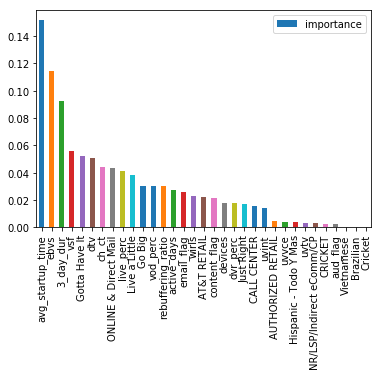

In [19]:
import matplotlib.pyplot as plt
feature_importances = pd.DataFrame(clf.feature_importances_, index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
ax = feature_importances.plot.bar(y='importance', rot=90)

Confusion matrix:
 [[7020 3357]
 [3668 6739]]


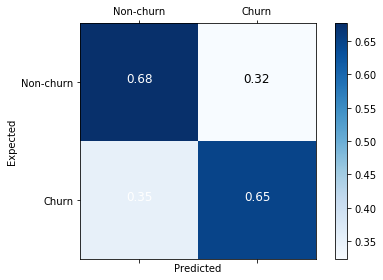

In [19]:
### Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

labels = ['Non-churn', 'Churn']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
ax.grid(False)

fmt = '.2f'
thresh = conf_mat.max() / 2.
for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
    plt.text(j, i, format(conf_mat[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_mat[i, j] > thresh else "black", fontsize = 12)

plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.tight_layout()
plt.show()

In [224]:
print(final.describe())

          day_0_dur     day_1_dur     day_2_dur     day_3_dur           vsf  \
count  83134.000000  83134.000000  83134.000000  83134.000000  83134.000000   
mean       0.011022      0.006611      0.015353      0.012722      0.002519   
std        0.036959      0.020277      0.044072      0.035506      0.012008   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000319      0.003496      0.004188      0.001589   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

               ebvs  avg_startup_time  rebuffering_ratio   sports_flag  \
count  83134.000000      83134.000000       83134.000000  83134.000000   
mean       0.001491       5135.304072           0.007400      0.243138   
std        0.007821       4439.249709           0.041674      0.42

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    3.6s finished


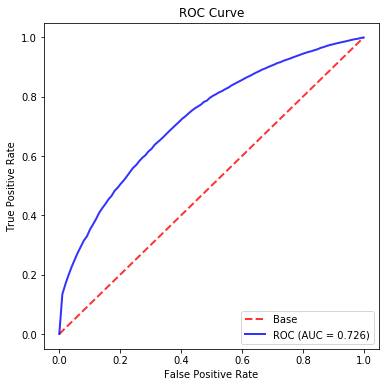

In [20]:
### ROC Curve

from scipy import interp
from sklearn.metrics import roc_curve, auc

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

probas_ = clf.predict_proba(X_test)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Base', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'ROC (AUC = %0.3f)' % (mean_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.grid(False)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

fig = plt.gcf()
fig.set_size_inches(6, 6)

plt.show()

In [39]:


import numpy as np
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)



{'bootstrap': [True, False],
 'max_depth': [5, 16, 27, 38, 50, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 8],
 'n_estimators': [100, 325, 550, 775, 1000]}


In [40]:


# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, scoring = 'roc_auc', param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=3, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 37.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 42.6min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 325, 550, 775, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 16, 27, 38, 50, None], 'min_samples_split': [2, 4, 8], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='roc_auc', verbose=3)

In [41]:
### Best params after randomized search
print(rf_random.best_params_)
clf = rf_random.best_estimator_

{'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 16, 'bootstrap': True}


In [ ]:
{'n_estimators': 1000, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 16, 'bootstrap': True}

In [49]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [50]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6140090613848683


In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X_train, y_train)

Accuracy of the GBM on test set: 0.662
             precision    recall  f1-score   support

          0       0.66      0.68      0.67     10377
          1       0.67      0.65      0.66     10407

avg / total       0.66      0.66      0.66     20784



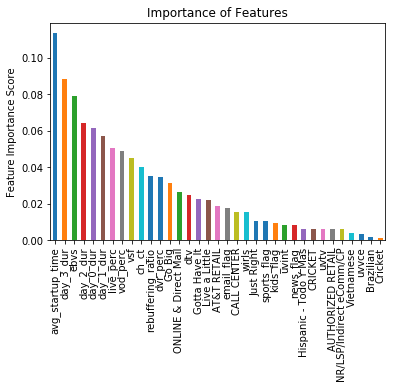

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.grid_search import GridSearchCV


baseline = GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
baseline.fit(X_train,y_train)
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(baseline.score(X_test, y_test)))
pred=baseline.predict(X_test)
print(classification_report(y_test, pred))

In [22]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.66136, std: 0.00287, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.66173, std: 0.00298, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.66000, std: 0.00232, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.65918, std: 0.00256, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.65897, std: 0.00360, params: {'learning_rate': 0.15, 'n_estimators': 1000},
  mean: 0.65860, std: 0.00209, params: {'learning_rate': 0.15, 'n_estimators': 1250},
  mean: 0.65793, std: 0.00217, params: {'learning_rate': 0.15, 'n_estimators': 1500},
  mean: 0.65638, std: 0.00147, params: {'learning_rate': 0.15, 'n_estimators': 1750},
  mean: 0.66202, std: 0.00288, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.66191, std: 0.00297, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.66236, std: 0.00282, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.66199, std: 0.00277, params: {'learning_rate': 0.1, 'n_estimators': 750},
  mean: 0.66191, std: 0.00270, params: {'learning_rate': 0.1, 'n_estimators': 1000},
  mean: 0.66173, std: 0.00374, params: {'learning_rate': 0.1, 'n_estimators': 1250},
  mean: 0.66130, std: 0.00261, params: {'learning_rate': 0.1, 'n_estimators': 1500},
  mean: 0.66013, std: 0.00385, params: {'learning_rate': 0.1, 'n_estimators': 1750},
  mean: 0.65743, std: 0.00331, params: {'learning_rate': 0.05, 'n_estimators': 100},
  mean: 0.66268, std: 0.00372, params: {'learning_rate': 0.05, 'n_estimators': 250},
  mean: 0.66350, std: 0.00379, params: {'learning_rate': 0.05, 'n_estimators': 500},
  mean: 0.66252, std: 0.00276, params: {'learning_rate': 0.05, 'n_estimators': 750},
  mean: 0.66200, std: 0.00265, params: {'learning_rate': 0.05, 'n_estimators': 1000},
  mean: 0.66210, std: 0.00241, params: {'learning_rate': 0.05, 'n_estimators': 1250},
  mean: 0.66207, std: 0.00240, params: {'learning_rate': 0.05, 'n_estimators': 1500},
  mean: 0.66130, std: 0.00348, params: {'learning_rate': 0.05, 'n_estimators': 1750},
  mean: 0.64271, std: 0.00152, params: {'learning_rate': 0.01, 'n_estimators': 100},
  mean: 0.65026, std: 0.00249, params: {'learning_rate': 0.01, 'n_estimators': 250},
  mean: 0.65820, std: 0.00248, params: {'learning_rate': 0.01, 'n_estimators': 500},
  mean: 0.66117, std: 0.00321, params: {'learning_rate': 0.01, 'n_estimators': 750},
  mean: 0.66244, std: 0.00295, params: {'learning_rate': 0.01, 'n_estimators': 1000},
  mean: 0.66295, std: 0.00286, params: {'learning_rate': 0.01, 'n_estimators': 1250},
  mean: 0.66306, std: 0.00292, params: {'learning_rate': 0.01, 'n_estimators': 1500},
  mean: 0.66348, std: 0.00302, params: {'learning_rate': 0.01, 'n_estimators': 1750},
  mean: 0.64164, std: 0.00196, params: {'learning_rate': 0.005, 'n_estimators': 100},
  mean: 0.64452, std: 0.00135, params: {'learning_rate': 0.005, 'n_estimators': 250},
  mean: 0.65052, std: 0.00237, params: {'learning_rate': 0.005, 'n_estimators': 500},
  mean: 0.65511, std: 0.00188, params: {'learning_rate': 0.005, 'n_estimators': 750},
  mean: 0.65846, std: 0.00249, params: {'learning_rate': 0.005, 'n_estimators': 1000},
  mean: 0.65992, std: 0.00273, params: {'learning_rate': 0.005, 'n_estimators': 1250},
  mean: 0.66074, std: 0.00270, params: {'learning_rate': 0.005, 'n_estimators': 1500},
  mean: 0.66236, std: 0.00324, params: {'learning_rate': 0.005, 'n_estimators': 1750},
  mean: 0.64069, std: 0.00218, params: {'learning_rate': 0.001, 'n_estimators': 100},
  mean: 0.64119, std: 0.00149, params: {'learning_rate': 0.001, 'n_estimators': 250},
  mean: 0.64249, std: 0.00158, params: {'learning_rate': 0.001, 'n_estimators': 500},
  mean: 0.64294, std: 0.00179, params: {'learning_rate': 0.001, 'n_estimators': 750},
  mean: 0.64433, std: 0.00213, params: {'learning_rate': 0.001, 'n_estimators': 1000},
  mean: 0.64488, std: 0.00197, params: {'learning_rate': 0.001, 'n_estimators': 1250},
  mean: 0.64624, std: 0.00154, params: {'learning_rate': 0.001, 'n_estimators': 1500},
  mean: 0.64694, std: 0.00181, params: {'learning_rate': 0.001, 'n_estimators': 1750}],
 {'learning_rate': 0.05, 'n_estimators': 500},
 0.663496391339214)

([mean: 0.66136, std: 0.00287, params: {'learning_rate': 0.15, 'n_estimators': 100},
  mean: 0.66173, std: 0.00298, params: {'learning_rate': 0.15, 'n_estimators': 250},
  mean: 0.66000, std: 0.00232, params: {'learning_rate': 0.15, 'n_estimators': 500},
  mean: 0.65918, std: 0.00256, params: {'learning_rate': 0.15, 'n_estimators': 750},
  mean: 0.65897, std: 0.00360, params: {'learning_rate': 0.15, 'n_estimators': 1000},
  mean: 0.65860, std: 0.00209, params: {'learning_rate': 0.15, 'n_estimators': 1250},
  mean: 0.65793, std: 0.00217, params: {'learning_rate': 0.15, 'n_estimators': 1500},
  mean: 0.65638, std: 0.00147, params: {'learning_rate': 0.15, 'n_estimators': 1750},
  mean: 0.66202, std: 0.00288, params: {'learning_rate': 0.1, 'n_estimators': 100},
  mean: 0.66191, std: 0.00297, params: {'learning_rate': 0.1, 'n_estimators': 250},
  mean: 0.66236, std: 0.00282, params: {'learning_rate': 0.1, 'n_estimators': 500},
  mean: 0.66199, std: 0.00277, params: {'learning_rate': 0.1, 'n

In [25]:
p_test2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05,n_estimators=500, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.65424, std: 0.00352, params: {'max_depth': 2},
  mean: 0.66135, std: 0.00306, params: {'max_depth': 3},
  mean: 0.66350, std: 0.00379, params: {'max_depth': 4},
  mean: 0.66454, std: 0.00283, params: {'max_depth': 5},
  mean: 0.66310, std: 0.00256, params: {'max_depth': 6},
  mean: 0.66313, std: 0.00170, params: {'max_depth': 7}],
 {'max_depth': 5},
 0.6645388933440256)

([mean: 0.65424, std: 0.00352, params: {'max_depth': 2},
  mean: 0.66135, std: 0.00306, params: {'max_depth': 3},
  mean: 0.66350, std: 0.00379, params: {'max_depth': 4},
  mean: 0.66454, std: 0.00283, params: {'max_depth': 5},
  mean: 0.66310, std: 0.00256, params: {'max_depth': 6},
  mean: 0.66313, std: 0.00170, params: {'max_depth': 7}],
 {'max_depth': 5},
 0.6645388933440256)

In [27]:
p_test4 = {'min_samples_split':[2,4,6,8,10,20,40,60,100], 'min_samples_leaf':[1,3,5,7,9]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test4, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.66454, std: 0.00283, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.66443, std: 0.00269, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.66417, std: 0.00213, params: {'min_samples_leaf': 1, 'min_samples_split': 6},
  mean: 0.66488, std: 0.00257, params: {'min_samples_leaf': 1, 'min_samples_split': 8},
  mean: 0.66472, std: 0.00298, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.66420, std: 0.00320, params: {'min_samples_leaf': 1, 'min_samples_split': 20},
  mean: 0.66295, std: 0.00264, params: {'min_samples_leaf': 1, 'min_samples_split': 40},
  mean: 0.66340, std: 0.00355, params: {'min_samples_leaf': 1, 'min_samples_split': 60},
  mean: 0.66361, std: 0.00324, params: {'min_samples_leaf': 1, 'min_samples_split': 100},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 2},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 4},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 6},
  mean: 0.66435, std: 0.00283, params: {'min_samples_leaf': 3, 'min_samples_split': 8},
  mean: 0.66433, std: 0.00133, params: {'min_samples_leaf': 3, 'min_samples_split': 10},
  mean: 0.66427, std: 0.00307, params: {'min_samples_leaf': 3, 'min_samples_split': 20},
  mean: 0.66359, std: 0.00378, params: {'min_samples_leaf': 3, 'min_samples_split': 40},
  mean: 0.66257, std: 0.00323, params: {'min_samples_leaf': 3, 'min_samples_split': 60},
  mean: 0.66225, std: 0.00290, params: {'min_samples_leaf': 3, 'min_samples_split': 100},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 2},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 4},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 6},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 8},
  mean: 0.66460, std: 0.00220, params: {'min_samples_leaf': 5, 'min_samples_split': 10},
  mean: 0.66438, std: 0.00323, params: {'min_samples_leaf': 5, 'min_samples_split': 20},
  mean: 0.66300, std: 0.00355, params: {'min_samples_leaf': 5, 'min_samples_split': 40},
  mean: 0.66265, std: 0.00284, params: {'min_samples_leaf': 5, 'min_samples_split': 60},
  mean: 0.66284, std: 0.00266, params: {'min_samples_leaf': 5, 'min_samples_split': 100},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 2},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 4},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 6},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 8},
  mean: 0.66425, std: 0.00292, params: {'min_samples_leaf': 7, 'min_samples_split': 10},
  mean: 0.66486, std: 0.00190, params: {'min_samples_leaf': 7, 'min_samples_split': 20},
  mean: 0.66340, std: 0.00259, params: {'min_samples_leaf': 7, 'min_samples_split': 40},
  mean: 0.66319, std: 0.00377, params: {'min_samples_leaf': 7, 'min_samples_split': 60},
  mean: 0.66313, std: 0.00341, params: {'min_samples_leaf': 7, 'min_samples_split': 100},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 2},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 4},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 6},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 8},
  mean: 0.66391, std: 0.00240, params: {'min_samples_leaf': 9, 'min_samples_split': 10},
  mean: 0.66460, std: 0.00311, params: {'min_samples_leaf': 9, 'min_samples_split': 20},
  mean: 0.66220, std: 0.00295, params: {'min_samples_leaf': 9, 'min_samples_split': 40},
  mean: 0.66338, std: 0.00342, params: {'min_samples_leaf': 9, 'min_samples_split': 60},
  mean: 0.66298, std: 0.00245, params: {'min_samples_leaf': 9, 'min_samples_split': 100}],
 {'min_samples_leaf': 1, 'min_samples_split': 8},
 0.6648757016840418)

([mean: 0.66454, std: 0.00283, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.66443, std: 0.00269, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.66417, std: 0.00213, params: {'min_samples_leaf': 1, 'min_samples_split': 6},
  mean: 0.66488, std: 0.00257, params: {'min_samples_leaf': 1, 'min_samples_split': 8},
  mean: 0.66472, std: 0.00298, params: {'min_samples_leaf': 1, 'min_samples_split': 10},
  mean: 0.66420, std: 0.00320, params: {'min_samples_leaf': 1, 'min_samples_split': 20},
  mean: 0.66295, std: 0.00264, params: {'min_samples_leaf': 1, 'min_samples_split': 40},
  mean: 0.66340, std: 0.00355, params: {'min_samples_leaf': 1, 'min_samples_split': 60},
  mean: 0.66361, std: 0.00324, params: {'min_samples_leaf': 1, 'min_samples_split': 100},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 2},
  mean: 0.66366, std: 0.00221, params: {'min_samples_leaf': 3, 'min_samples_split': 4},
  mean: 0.66366, std: 0.00

In [28]:
#TUNING MAX FEATURES
p_test5 = {'max_features':[2,3,4,5,6,7]}
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=8, min_samples_leaf=1, subsample=1, random_state=10), 
param_grid = p_test5, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.66314, std: 0.00120, params: {'max_features': 2},
  mean: 0.66194, std: 0.00252, params: {'max_features': 3},
  mean: 0.66353, std: 0.00396, params: {'max_features': 4},
  mean: 0.66488, std: 0.00257, params: {'max_features': 5},
  mean: 0.66383, std: 0.00275, params: {'max_features': 6},
  mean: 0.66489, std: 0.00292, params: {'max_features': 7}],
 {'max_features': 7},
 0.6648917401764234)

([mean: 0.66314, std: 0.00120, params: {'max_features': 2},
  mean: 0.66194, std: 0.00252, params: {'max_features': 3},
  mean: 0.66353, std: 0.00396, params: {'max_features': 4},
  mean: 0.66488, std: 0.00257, params: {'max_features': 5},
  mean: 0.66383, std: 0.00275, params: {'max_features': 6},
  mean: 0.66489, std: 0.00292, params: {'max_features': 7}],
 {'max_features': 7},
 0.6648917401764234)

In [29]:
p_test6= {'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=8, min_samples_leaf=1,max_features=7, random_state=10), 
param_grid = p_test6, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(X_train,y_train)
tuning.grid_scores_, tuning.best_params_, tuning.best_score_

([mean: 0.66455, std: 0.00253, params: {'subsample': 0.7},
  mean: 0.66545, std: 0.00218, params: {'subsample': 0.75},
  mean: 0.66513, std: 0.00253, params: {'subsample': 0.8},
  mean: 0.66529, std: 0.00161, params: {'subsample': 0.85},
  mean: 0.66532, std: 0.00264, params: {'subsample': 0.9},
  mean: 0.66582, std: 0.00238, params: {'subsample': 0.95},
  mean: 0.66489, std: 0.00292, params: {'subsample': 1}],
 {'subsample': 0.95},
 0.665821972734563)

([mean: 0.66455, std: 0.00253, params: {'subsample': 0.7},
  mean: 0.66545, std: 0.00218, params: {'subsample': 0.75},
  mean: 0.66513, std: 0.00253, params: {'subsample': 0.8},
  mean: 0.66529, std: 0.00161, params: {'subsample': 0.85},
  mean: 0.66532, std: 0.00264, params: {'subsample': 0.9},
  mean: 0.66582, std: 0.00238, params: {'subsample': 0.95},
  mean: 0.66489, std: 0.00292, params: {'subsample': 1}],
 {'subsample': 0.95},
 0.665821972734563)

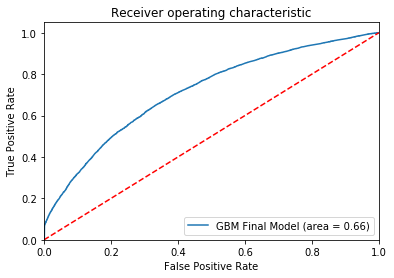

In [97]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.ensemble import GradientBoostingClassifier

#run models
new=GradientBoostingClassifier(learning_rate=0.05, n_estimators=500,max_depth=5, min_samples_split=8, min_samples_leaf=1,max_features=7 , subsample=0.95, random_state=10)
new.fit(X_train,y_train)

#calculate values for ROC AUC plot
#new tuned model 
new_roc_auc = roc_auc_score(y_test, new.predict(X_test))
fprnew, tprnew, thresholds_new = roc_curve(y_test, new.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fprnew, tprnew, label='GBM Final Model (area = %0.2f)' % new_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Accuracy of the GBM on test set: 0.658
             precision    recall  f1-score   support

          0       0.65      0.67      0.66     10336
          1       0.66      0.64      0.65     10446

avg / total       0.66      0.66      0.66     20782



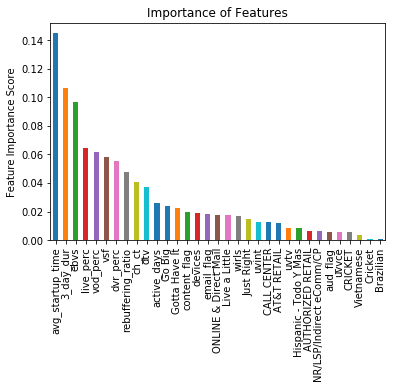

In [98]:
predictors=list(X_train)
feat_imp = pd.Series(new.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(new.score(X_test, y_test)))
pred=new.predict(X_test)
print(classification_report(y_test, pred))

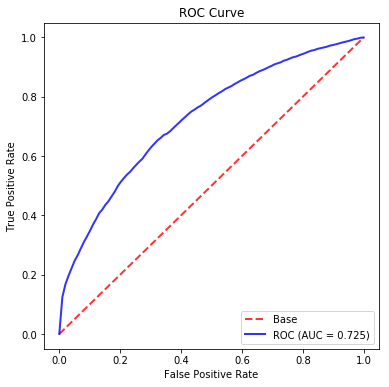

In [32]:
### ROC Curve

from scipy import interp
from sklearn.metrics import roc_curve, auc

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

probas_ = new.predict_proba(X_test)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Base', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'ROC (AUC = %0.3f)' % (mean_auc), lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.grid(False)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

fig = plt.gcf()
fig.set_size_inches(6, 6)

plt.show()

In [ ]:
add sept

check

chat data (vishnu)
device  device_dim(Ira)
ct stereams >3min & <3min (next table)

overlapping channels aka DTVNOW only channels